<a href="https://colab.research.google.com/github/vinitkumar018/Greenwashing-NLP/blob/main/S%26P_500_Measure_of_Greenwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install PyPDF2
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 24.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 37.5 MB/s 


In [ ]:
!pip3 install MoreThanSentiments

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 9.7 MB 46.6 MB/s 
     |████████████████████████████████| 1.5 MB 56.7 MB/s 
     |████████████████████████████████| 6.5 MB 71.3 MB/s 
     |████████████████████████████████| 671 kB 72.1 MB/s 
     |████████████████████████████████| 13.7 MB 51.6 MB/s 
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thin

In [ ]:
!pip3 install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pycryptodome==3.15.0
!pip3 install crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 12.3 MB/s 
  Attempting uninstall: pycryptodome
    Found existing installation: pycryptodome 3.16.0
    Uninstalling pycryptodome-3.16.0:
      Successfully uninstalled pycryptodome-3.16.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587 kB 31.8 MB/s 


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import os
import re
import PyPDF2
import inflect
import unicodedata
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
from tabulate import tabulate
from nltk.corpus import opinion_lexicon
import scipy.stats as stats
import MoreThanSentiments as mts
import pandas as pd

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Loughran and McDonald dictionary for positive and negative words
lmdict = {'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated',
                       'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational',
                       'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish',
                       'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating',
                       'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences',
                       'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness',
                       'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse',
                       'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing',
                       'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate',
                       'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries',
                       'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'aftermath', 'aftermaths',
                       'against', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggravation', 'aggravations',
                       'alerted', 'alerting', 'alienate', 'alienated', 'alienates', 'alienating', 'alienation',
                       'alienations', 'allegation', 'allegations', 'allege', 'alleged', 'allegedly', 'alleges',
                       'alleging', 'annoy', 'annoyance', 'annoyances', 'annoyed', 'annoying', 'annoys', 'annul',
                       'annulled', 'annulling', 'annulment', 'annulments', 'annuls', 'anomalies', 'anomalous',
                       'anomalously', 'anomaly', 'anticompetitive', 'antitrust', 'argue', 'argued', 'arguing',
                       'argument', 'argumentative', 'arguments', 'arrearage', 'arrearages', 'arrears', 'arrest',
                       'arrested', 'arrests', 'artificially', 'assault', 'assaulted', 'assaulting', 'assaults',
                       'assertions', 'attrition', 'aversely', 'backdating', 'bad', 'bail', 'bailout', 'balk', 'balked',
                       'bankrupt', 'bankruptcies', 'bankruptcy', 'bankrupted', 'bankrupting', 'bankrupts', 'bans',
                       'barred', 'barrier', 'barriers', 'bottleneck', 'bottlenecks', 'boycott', 'boycotted',
                       'boycotting', 'boycotts', 'breach', 'breached', 'breaches', 'breaching', 'break', 'breakage',
                       'breakages', 'breakdown', 'breakdowns', 'breaking', 'breaks', 'bribe', 'bribed', 'briberies',
                       'bribery', 'bribes', 'bribing', 'bridge', 'broken', 'burden', 'burdened', 'burdening', 'burdens',
                       'burdensome', 'burned', 'calamities', 'calamitous', 'calamity', 'cancel', 'canceled',
                       'canceling', 'cancellation', 'cancellations', 'cancelled', 'cancelling', 'cancels', 'careless',
                       'carelessly', 'carelessness', 'catastrophe', 'catastrophes', 'catastrophic', 'catastrophically',
                       'caution', 'cautionary', 'cautioned', 'cautioning', 'cautions', 'cease', 'ceased', 'ceases',
                       'ceasing', 'censure', 'censured', 'censures', 'censuring', 'challenge', 'challenged',
                       'challenges', 'challenging', 'chargeoffs', 'circumvent', 'circumvented', 'circumventing',
                       'circumvention', 'circumventions', 'circumvents', 'claiming', 'claims', 'clawback', 'closed',
                       'closeout', 'closeouts', 'closing', 'closings', 'closure', 'closures', 'coerce', 'coerced',
                       'coerces', 'coercing', 'coercion', 'coercive', 'collapse', 'collapsed', 'collapses',
                       'collapsing', 'collision', 'collisions', 'collude', 'colluded', 'colludes', 'colluding',
                       'collusion', 'collusions', 'collusive', 'complain', 'complained', 'complaining', 'complains',
                       'complaint', 'complaints', 'complicate', 'complicated', 'complicates', 'complicating',
                       'complication', 'complications', 'compulsion', 'concealed', 'concealing', 'concede', 'conceded',
                       'concedes', 'conceding', 'concern', 'concerned', 'concerns', 'conciliating', 'conciliation',
                       'conciliations', 'condemn', 'condemnation', 'condemnations', 'condemned', 'condemning',
                       'condemns', 'condone', 'condoned', 'confess', 'confessed', 'confesses', 'confessing',
                       'confession', 'confine', 'confined', 'confinement', 'confinements', 'confines', 'confining',
                       'confiscate', 'confiscated', 'confiscates', 'confiscating', 'confiscation', 'confiscations',
                       'conflict', 'conflicted', 'conflicting', 'conflicts', 'confront', 'confrontation',
                       'confrontational', 'confrontations', 'confronted', 'confronting', 'confronts', 'confuse',
                       'confused', 'confuses', 'confusing', 'confusingly', 'confusion', 'conspiracies', 'conspiracy',
                       'conspirator', 'conspiratorial', 'conspirators', 'conspire', 'conspired', 'conspires',
                       'conspiring', 'contempt', 'contend', 'contended', 'contending', 'contends', 'contention',
                       'contentions', 'contentious', 'contentiously', 'contested', 'contesting', 'contraction',
                       'contractions', 'contradict', 'contradicted', 'contradicting', 'contradiction', 'contradictions',
                       'contradictory', 'contradicts', 'contrary', 'controversial', 'controversies', 'controversy',
                       'convict', 'convicted', 'convicting', 'conviction', 'convictions', 'corrected', 'correcting',
                       'correction', 'corrections', 'corrects', 'corrupt', 'corrupted', 'corrupting', 'corruption',
                       'corruptions', 'corruptly', 'corruptness', 'costly', 'counterclaim', 'counterclaimed',
                       'counterclaiming', 'counterclaims', 'counterfeit', 'counterfeited', 'counterfeiter',
                       'counterfeiters', 'counterfeiting', 'counterfeits', 'countermeasure', 'countermeasures', 'crime',
                       'crimes', 'criminal', 'criminally', 'criminals', 'crises', 'crisis', 'critical', 'critically',
                       'criticism', 'criticisms', 'criticize', 'criticized', 'criticizes', 'criticizing', 'crucial',
                       'crucially', 'culpability', 'culpable', 'culpably', 'cumbersome', 'curtail', 'curtailed',
                       'curtailing', 'curtailment', 'curtailments', 'curtails', 'cut', 'cutback', 'cutbacks',
                       'cyberattack', 'cyberattacks', 'cyberbullying', 'cybercrime', 'cybercrimes', 'cybercriminal',
                       'cybercriminals', 'damage', 'damaged', 'damages', 'damaging', 'dampen', 'dampened', 'danger',
                       'dangerous', 'dangerously', 'dangers', 'deadlock', 'deadlocked', 'deadlocking', 'deadlocks',
                       'deadweight', 'deadweights', 'debarment', 'debarments', 'debarred', 'deceased', 'deceit',
                       'deceitful', 'deceitfulness', 'deceive', 'deceived', 'deceives', 'deceiving', 'deception',
                       'deceptions', 'deceptive', 'deceptively', 'decline', 'declined', 'declines', 'declining',
                       'deface', 'defaced', 'defacement', 'defamation', 'defamations', 'defamatory', 'defame',
                       'defamed', 'defames', 'defaming', 'default', 'defaulted', 'defaulting', 'defaults', 'defeat',
                       'defeated', 'defeating', 'defeats', 'defect', 'defective', 'defects', 'defend', 'defendant',
                       'defendants', 'defended', 'defending', 'defends', 'defensive', 'defer', 'deficiencies',
                       'deficiency', 'deficient', 'deficit', 'deficits', 'defraud', 'defrauded', 'defrauding',
                       'defrauds', 'defunct', 'degradation', 'degradations', 'degrade', 'degraded', 'degrades',
                       'degrading', 'delay', 'delayed', 'delaying', 'delays', 'deleterious', 'deliberate',
                       'deliberated', 'deliberately', 'delinquencies', 'delinquency', 'delinquent', 'delinquently',
                       'delinquents', 'delist', 'delisted', 'delisting', 'delists', 'demise', 'demised', 'demises',
                       'demising', 'demolish', 'demolished', 'demolishes', 'demolishing', 'demolition', 'demolitions',
                       'demote', 'demoted', 'demotes', 'demoting', 'demotion', 'demotions', 'denial', 'denials',
                       'denied', 'denies', 'denigrate', 'denigrated', 'denigrates', 'denigrating', 'denigration',
                       'deny', 'denying', 'deplete', 'depleted', 'depletes', 'depleting', 'depletion', 'depletions',
                       'deprecation', 'depress', 'depressed', 'depresses', 'depressing', 'deprivation', 'deprive',
                       'deprived', 'deprives', 'depriving', 'derelict', 'dereliction', 'derogatory', 'destabilization',
                       'destabilize', 'destabilized', 'destabilizing', 'destroy', 'destroyed', 'destroying', 'destroys',
                       'destruction', 'destructive', 'detain', 'detained', 'detention', 'detentions', 'deter',
                       'deteriorate', 'deteriorated', 'deteriorates', 'deteriorating', 'deterioration',
                       'deteriorations', 'deterred', 'deterrence', 'deterrences', 'deterrent', 'deterrents',
                       'deterring', 'deters', 'detract', 'detracted', 'detracting', 'detriment', 'detrimental',
                       'detrimentally', 'detriments', 'devalue', 'devalued', 'devalues', 'devaluing', 'devastate',
                       'devastated', 'devastating', 'devastation', 'deviate', 'deviated', 'deviates', 'deviating',
                       'deviation', 'deviations', 'devolve', 'devolved', 'devolves', 'devolving', 'difficult',
                       'difficulties', 'difficultly', 'difficulty', 'diminish', 'diminished', 'diminishes',
                       'diminishing', 'diminution', 'disadvantage', 'disadvantaged', 'disadvantageous', 'disadvantages',
                       'disaffiliation', 'disagree', 'disagreeable', 'disagreed', 'disagreeing', 'disagreement',
                       'disagreements', 'disagrees', 'disallow', 'disallowance', 'disallowances', 'disallowed',
                       'disallowing', 'disallows', 'disappear', 'disappearance', 'disappearances', 'disappeared',
                       'disappearing', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingly',
                       'disappointment', 'disappointments', 'disappoints', 'disapproval', 'disapprovals', 'disapprove',
                       'disapproved', 'disapproves', 'disapproving', 'disassociates', 'disassociating',
                       'disassociation', 'disassociations', 'disaster', 'disasters', 'disastrous', 'disastrously',
                       'disavow', 'disavowal', 'disavowed', 'disavowing', 'disavows', 'disciplinary', 'disclaim',
                       'disclaimed', 'disclaimer', 'disclaimers', 'disclaiming', 'disclaims', 'disclose', 'disclosed',
                       'discloses', 'disclosing', 'discontinuance', 'discontinuances', 'discontinuation',
                       'discontinuations', 'discontinue', 'discontinued', 'discontinues', 'discontinuing', 'discourage',
                       'discouraged', 'discourages', 'discouraging', 'discredit', 'discredited', 'discrediting',
                       'discredits', 'discrepancies', 'discrepancy', 'disfavor', 'disfavored', 'disfavoring',
                       'disfavors', 'disgorge', 'disgorged', 'disgorgement', 'disgorgements', 'disgorges', 'disgorging',
                       'disgrace', 'disgraceful', 'disgracefully', 'dishonest', 'dishonestly', 'dishonesty', 'dishonor',
                       'dishonorable', 'dishonorably', 'dishonored', 'dishonoring', 'dishonors', 'disincentives',
                       'disinterested', 'disinterestedly', 'disinterestedness', 'disloyal', 'disloyally', 'disloyalty',
                       'dismal', 'dismally', 'dismiss', 'dismissal', 'dismissals', 'dismissed', 'dismisses',
                       'dismissing', 'disorderly', 'disparage', 'disparaged', 'disparagement', 'disparagements',
                       'disparages', 'disparaging', 'disparagingly', 'disparities', 'disparity', 'displace',
                       'displaced', 'displacement', 'displacements', 'displaces', 'displacing', 'dispose', 'dispossess',
                       'dispossessed', 'dispossesses', 'dispossessing', 'disproportion', 'disproportional',
                       'disproportionate', 'disproportionately', 'dispute', 'disputed', 'disputes', 'disputing',
                       'disqualification', 'disqualifications', 'disqualified', 'disqualifies', 'disqualify',
                       'disqualifying', 'disregard', 'disregarded', 'disregarding', 'disregards', 'disreputable',
                       'disrepute', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptions', 'disruptive',
                       'disrupts', 'dissatisfaction', 'dissatisfied', 'dissent', 'dissented', 'dissenter', 'dissenters',
                       'dissenting', 'dissents', 'dissident', 'dissidents', 'dissolution', 'dissolutions', 'distort',
                       'distorted', 'distorting', 'distortion', 'distortions', 'distorts', 'distract', 'distracted',
                       'distracting', 'distraction', 'distractions', 'distracts', 'distress', 'distressed', 'disturb',
                       'disturbance', 'disturbances', 'disturbed', 'disturbing', 'disturbs', 'diversion', 'divert',
                       'diverted', 'diverting', 'diverts', 'divest', 'divested', 'divesting', 'divestiture',
                       'divestitures', 'divestment', 'divestments', 'divests', 'divorce', 'divorced', 'divulge',
                       'divulged', 'divulges', 'divulging', 'doubt', 'doubted', 'doubtful', 'doubts', 'downgrade',
                       'downgraded', 'downgrades', 'downgrading', 'downsize', 'downsized', 'downsizes', 'downsizing',
                       'downsizings', 'downtime', 'downtimes', 'downturn', 'downturns', 'downward', 'downwards', 'drag',
                       'drastic', 'drastically', 'drawback', 'drawbacks', 'dropped', 'drought', 'droughts', 'duress',
                       'dysfunction', 'dysfunctional', 'dysfunctions', 'easing', 'egregious', 'egregiously', 'embargo',
                       'embargoed', 'embargoes', 'embargoing', 'embarrass', 'embarrassed', 'embarrasses',
                       'embarrassing', 'embarrassment', 'embarrassments', 'embezzle', 'embezzled', 'embezzlement',
                       'embezzlements', 'embezzler', 'embezzles', 'embezzling', 'encroach', 'encroached', 'encroaches',
                       'encroaching', 'encroachment', 'encroachments', 'encumber', 'encumbered', 'encumbering',
                       'encumbers', 'encumbrance', 'encumbrances', 'endanger', 'endangered', 'endangering',
                       'endangerment', 'endangers', 'enjoin', 'enjoined', 'enjoining', 'enjoins', 'erode', 'eroded',
                       'erodes', 'eroding', 'erosion', 'erratic', 'erratically', 'erred', 'erring', 'erroneous',
                       'erroneously', 'error', 'errors', 'errs', 'escalate', 'escalated', 'escalates', 'escalating',
                       'evade', 'evaded', 'evades', 'evading', 'evasion', 'evasions', 'evasive', 'evict', 'evicted',
                       'evicting', 'eviction', 'evictions', 'evicts', 'exacerbate', 'exacerbated', 'exacerbates',
                       'exacerbating', 'exacerbation', 'exacerbations', 'exaggerate', 'exaggerated', 'exaggerates',
                       'exaggerating', 'exaggeration', 'excessive', 'excessively', 'exculpate', 'exculpated',
                       'exculpates', 'exculpating', 'exculpation', 'exculpations', 'exculpatory', 'exonerate',
                       'exonerated', 'exonerates', 'exonerating', 'exoneration', 'exonerations', 'exploit',
                       'exploitation', 'exploitations', 'exploitative', 'exploited', 'exploiting', 'exploits', 'expose',
                       'exposed', 'exposes', 'exposing', 'expropriate', 'expropriated', 'expropriates', 'expropriating',
                       'expropriation', 'expropriations', 'expulsion', 'expulsions', 'extenuating', 'fail', 'failed',
                       'failing', 'failings', 'fails', 'failure', 'failures', 'fallout', 'false', 'falsely',
                       'falsification', 'falsifications', 'falsified', 'falsifies', 'falsify', 'falsifying', 'falsity',
                       'fatalities', 'fatality', 'fatally', 'fault', 'faulted', 'faults', 'faulty', 'fear', 'fears',
                       'felonies', 'felonious', 'felony', 'fictitious', 'fined', 'fines', 'fired', 'firing', 'flaw',
                       'flawed', 'flaws', 'forbid', 'forbidden', 'forbidding', 'forbids', 'force', 'forced', 'forcing',
                       'foreclose', 'foreclosed', 'forecloses', 'foreclosing', 'foreclosure', 'foreclosures', 'forego',
                       'foregoes', 'foregone', 'forestall', 'forestalled', 'forestalling', 'forestalls', 'forfeit',
                       'forfeited', 'forfeiting', 'forfeits', 'forfeiture', 'forfeitures', 'forgers', 'forgery',
                       'fraud', 'frauds', 'fraudulence', 'fraudulent', 'fraudulently', 'frivolous', 'frivolously',
                       'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustratingly', 'frustration',
                       'frustrations', 'fugitive', 'fugitives', 'gratuitous', 'gratuitously', 'grievance', 'grievances',
                       'grossly', 'groundless', 'guilty', 'halt', 'halted', 'hamper', 'hampered', 'hampering',
                       'hampers', 'harass', 'harassed', 'harassing', 'harassment', 'hardship', 'hardships', 'harm',
                       'harmed', 'harmful', 'harmfully', 'harming', 'harms', 'harsh', 'harsher', 'harshest', 'harshly',
                       'harshness', 'hazard', 'hazardous', 'hazards', 'hinder', 'hindered', 'hindering', 'hinders',
                       'hindrance', 'hindrances', 'hostile', 'hostility', 'hurt', 'hurting', 'idle', 'idled', 'idling',
                       'ignore', 'ignored', 'ignores', 'ignoring', 'ill', 'illegal', 'illegalities', 'illegality',
                       'illegally', 'illegible', 'illicit', 'illicitly', 'illiquid', 'illiquidity', 'imbalance',
                       'imbalances', 'immature', 'immoral', 'impair', 'impaired', 'impairing', 'impairment',
                       'impairments', 'impairs', 'impasse', 'impasses', 'impede', 'impeded', 'impedes', 'impediment',
                       'impediments', 'impeding', 'impending', 'imperative', 'imperfection', 'imperfections', 'imperil',
                       'impermissible', 'implicate', 'implicated', 'implicates', 'implicating', 'impossibility',
                       'impossible', 'impound', 'impounded', 'impounding', 'impounds', 'impracticable', 'impractical',
                       'impracticalities', 'impracticality', 'imprisonment', 'improper', 'improperly', 'improprieties',
                       'impropriety', 'imprudent', 'imprudently', 'inability', 'inaccessible', 'inaccuracies',
                       'inaccuracy', 'inaccurate', 'inaccurately', 'inaction', 'inactions', 'inactivate', 'inactivated',
                       'inactivates', 'inactivating', 'inactivation', 'inactivations', 'inactivity', 'inadequacies',
                       'inadequacy', 'inadequate', 'inadequately', 'inadvertent', 'inadvertently', 'inadvisability',
                       'inadvisable', 'inappropriate', 'inappropriately', 'inattention', 'incapable', 'incapacitated',
                       'incapacity', 'incarcerate', 'incarcerated', 'incarcerates', 'incarcerating', 'incarceration',
                       'incarcerations', 'incidence', 'incidences', 'incident', 'incidents', 'incompatibilities',
                       'incompatibility', 'incompatible', 'incompetence', 'incompetency', 'incompetent',
                       'incompetently', 'incompetents', 'incomplete', 'incompletely', 'incompleteness', 'inconclusive',
                       'inconsistencies', 'inconsistency', 'inconsistent', 'inconsistently', 'inconvenience',
                       'inconveniences', 'inconvenient', 'incorrect', 'incorrectly', 'incorrectness', 'indecency',
                       'indecent', 'indefeasible', 'indefeasibly', 'indict', 'indictable', 'indicted', 'indicting',
                       'indictment', 'indictments', 'ineffective', 'ineffectively', 'ineffectiveness', 'inefficiencies',
                       'inefficiency', 'inefficient', 'inefficiently', 'ineligibility', 'ineligible', 'inequitable',
                       'inequitably', 'inequities', 'inequity', 'inevitable', 'inexperience', 'inexperienced',
                       'inferior', 'inflicted', 'infraction', 'infractions', 'infringe', 'infringed', 'infringement',
                       'infringements', 'infringes', 'infringing', 'inhibited', 'inimical', 'injunction', 'injunctions',
                       'injure', 'injured', 'injures', 'injuries', 'injuring', 'injurious', 'injury', 'inordinate',
                       'inordinately', 'inquiry', 'insecure', 'insensitive', 'insolvencies', 'insolvency', 'insolvent',
                       'instability', 'insubordination', 'insufficiency', 'insufficient', 'insufficiently',
                       'insurrection', 'insurrections', 'intentional', 'interfere', 'interfered', 'interference',
                       'interferences', 'interferes', 'interfering', 'intermittent', 'intermittently', 'interrupt',
                       'interrupted', 'interrupting', 'interruption', 'interruptions', 'interrupts', 'intimidation',
                       'intrusion', 'invalid', 'invalidate', 'invalidated', 'invalidates', 'invalidating',
                       'invalidation', 'invalidity', 'investigate', 'investigated', 'investigates', 'investigating',
                       'investigation', 'investigations', 'involuntarily', 'involuntary', 'irreconcilable',
                       'irreconcilably', 'irrecoverable', 'irrecoverably', 'irregular', 'irregularities',
                       'irregularity', 'irregularly', 'irreparable', 'irreparably', 'irreversible', 'jeopardize',
                       'jeopardized', 'justifiable', 'kickback', 'kickbacks', 'knowingly', 'lack', 'lacked', 'lacking',
                       'lackluster', 'lacks', 'lag', 'lagged', 'lagging', 'lags', 'lapse', 'lapsed', 'lapses',
                       'lapsing', 'late', 'laundering', 'layoff', 'layoffs', 'lie', 'limitation', 'limitations',
                       'lingering', 'liquidate', 'liquidated', 'liquidates', 'liquidating', 'liquidation',
                       'liquidations', 'liquidator', 'liquidators', 'litigant', 'litigants', 'litigate', 'litigated',
                       'litigates', 'litigating', 'litigation', 'litigations', 'lockout', 'lockouts', 'lose', 'loses',
                       'losing', 'loss', 'losses', 'lost', 'lying', 'malfeasance', 'malfunction', 'malfunctioned',
                       'malfunctioning', 'malfunctions', 'malice', 'malicious', 'maliciously', 'malpractice',
                       'manipulate', 'manipulated', 'manipulates', 'manipulating', 'manipulation', 'manipulations',
                       'manipulative', 'markdown', 'markdowns', 'misapplication', 'misapplications', 'misapplied',
                       'misapplies', 'misapply', 'misapplying', 'misappropriate', 'misappropriated', 'misappropriates',
                       'misappropriating', 'misappropriation', 'misappropriations', 'misbranded', 'miscalculate',
                       'miscalculated', 'miscalculates', 'miscalculating', 'miscalculation', 'miscalculations',
                       'mischaracterization', 'mischief', 'misclassification', 'misclassifications', 'misclassified',
                       'misclassify', 'miscommunication', 'misconduct', 'misdated', 'misdemeanor', 'misdemeanors',
                       'misdirected', 'mishandle', 'mishandled', 'mishandles', 'mishandling', 'misinform',
                       'misinformation', 'misinformed', 'misinforming', 'misinforms', 'misinterpret',
                       'misinterpretation', 'misinterpretations', 'misinterpreted', 'misinterpreting', 'misinterprets',
                       'misjudge', 'misjudged', 'misjudges', 'misjudging', 'misjudgment', 'misjudgments', 'mislabel',
                       'mislabeled', 'mislabeling', 'mislabelled', 'mislabels', 'mislead', 'misleading', 'misleadingly',
                       'misleads', 'misled', 'mismanage', 'mismanaged', 'mismanagement', 'mismanages', 'mismanaging',
                       'mismatch', 'mismatched', 'mismatches', 'mismatching', 'misplaced', 'misprice', 'mispricing',
                       'mispricings', 'misrepresent', 'misrepresentation', 'misrepresentations', 'misrepresented',
                       'misrepresenting', 'misrepresents', 'miss', 'missed', 'misses', 'misstate', 'misstated',
                       'misstatement', 'misstatements', 'misstates', 'misstating', 'misstep', 'missteps', 'mistake',
                       'mistaken', 'mistakenly', 'mistakes', 'mistaking', 'mistrial', 'mistrials', 'misunderstand',
                       'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'misused', 'misuses',
                       'misusing', 'monopolistic', 'monopolists', 'monopolization', 'monopolize', 'monopolized',
                       'monopolizes', 'monopolizing', 'monopoly', 'moratoria', 'moratorium', 'moratoriums',
                       'mothballed', 'mothballing', 'negative', 'negatively', 'negatives', 'neglect', 'neglected',
                       'neglectful', 'neglecting', 'neglects', 'negligence', 'negligences', 'negligent', 'negligently',
                       'nonattainment', 'noncompetitive', 'noncompliance', 'noncompliances', 'noncompliant',
                       'noncomplying', 'nonconforming', 'nonconformities', 'nonconformity', 'nondisclosure',
                       'nonfunctional', 'nonpayment', 'nonpayments', 'nonperformance', 'nonperformances',
                       'nonperforming', 'nonproducing', 'nonproductive', 'nonrecoverable', 'nonrenewal', 'nuisance',
                       'nuisances', 'nullification', 'nullifications', 'nullified', 'nullifies', 'nullify',
                       'nullifying', 'objected', 'objecting', 'objection', 'objectionable', 'objectionably',
                       'objections', 'obscene', 'obscenity', 'obsolescence', 'obsolete', 'obstacle', 'obstacles',
                       'obstruct', 'obstructed', 'obstructing', 'obstruction', 'obstructions', 'offence', 'offences',
                       'offend', 'offended', 'offender', 'offenders', 'offending', 'offends', 'omission', 'omissions',
                       'omit', 'omits', 'omitted', 'omitting', 'onerous', 'opportunistic', 'opportunistically',
                       'oppose', 'opposed', 'opposes', 'opposing', 'opposition', 'oppositions', 'outage', 'outages',
                       'outdated', 'outmoded', 'overage', 'overages', 'overbuild', 'overbuilding', 'overbuilds',
                       'overbuilt', 'overburden', 'overburdened', 'overburdening', 'overcapacities', 'overcapacity',
                       'overcharge', 'overcharged', 'overcharges', 'overcharging', 'overcome', 'overcomes',
                       'overcoming', 'overdue', 'overestimate', 'overestimated', 'overestimates', 'overestimating',
                       'overestimation', 'overestimations', 'overload', 'overloaded', 'overloading', 'overloads',
                       'overlook', 'overlooked', 'overlooking', 'overlooks', 'overpaid', 'overpayment', 'overpayments',
                       'overproduced', 'overproduces', 'overproducing', 'overproduction', 'overrun', 'overrunning',
                       'overruns', 'overshadow', 'overshadowed', 'overshadowing', 'overshadows', 'overstate',
                       'overstated', 'overstatement', 'overstatements', 'overstates', 'overstating', 'oversupplied',
                       'oversupplies', 'oversupply', 'oversupplying', 'overtly', 'overturn', 'overturned',
                       'overturning', 'overturns', 'overvalue', 'overvalued', 'overvaluing', 'panic', 'panics',
                       'penalize', 'penalized', 'penalizes', 'penalizing', 'penalties', 'penalty', 'peril', 'perils',
                       'perjury', 'perpetrate', 'perpetrated', 'perpetrates', 'perpetrating', 'perpetration', 'persist',
                       'persisted', 'persistence', 'persistent', 'persistently', 'persisting', 'persists', 'pervasive',
                       'pervasively', 'pervasiveness', 'petty', 'picket', 'picketed', 'picketing', 'plaintiff',
                       'plaintiffs', 'plea', 'plead', 'pleaded', 'pleading', 'pleadings', 'pleads', 'pleas', 'pled',
                       'poor', 'poorly', 'poses', 'posing', 'postpone', 'postponed', 'postponement', 'postponements',
                       'postpones', 'postponing', 'precipitated', 'precipitous', 'precipitously', 'preclude',
                       'precluded', 'precludes', 'precluding', 'predatory', 'prejudice', 'prejudiced', 'prejudices',
                       'prejudicial', 'prejudicing', 'premature', 'prematurely', 'pressing', 'pretrial', 'preventing',
                       'prevention', 'prevents', 'problem', 'problematic', 'problematical', 'problems', 'prolong',
                       'prolongation', 'prolongations', 'prolonged', 'prolonging', 'prolongs', 'prone', 'prosecute',
                       'prosecuted', 'prosecutes', 'prosecuting', 'prosecution', 'prosecutions', 'protest', 'protested',
                       'protester', 'protesters', 'protesting', 'protestor', 'protestors', 'protests', 'protracted',
                       'protraction', 'provoke', 'provoked', 'provokes', 'provoking', 'punished', 'punishes',
                       'punishing', 'punishment', 'punishments', 'punitive', 'purport', 'purported', 'purportedly',
                       'purporting', 'purports', 'question', 'questionable', 'questionably', 'questioned',
                       'questioning', 'questions', 'quit', 'quitting', 'racketeer', 'racketeering', 'rationalization',
                       'rationalizations', 'rationalize', 'rationalized', 'rationalizes', 'rationalizing',
                       'reassessment', 'reassessments', 'reassign', 'reassigned', 'reassigning', 'reassignment',
                       'reassignments', 'reassigns', 'recall', 'recalled', 'recalling', 'recalls', 'recession',
                       'recessionary', 'recessions', 'reckless', 'recklessly', 'recklessness', 'redact', 'redacted',
                       'redacting', 'redaction', 'redactions', 'redefault', 'redefaulted', 'redefaults', 'redress',
                       'redressed', 'redresses', 'redressing', 'refusal', 'refusals', 'refuse', 'refused', 'refuses',
                       'refusing', 'reject', 'rejected', 'rejecting', 'rejection', 'rejections', 'rejects',
                       'relinquish', 'relinquished', 'relinquishes', 'relinquishing', 'relinquishment',
                       'relinquishments', 'reluctance', 'reluctant', 'renegotiate', 'renegotiated', 'renegotiates',
                       'renegotiating', 'renegotiation', 'renegotiations', 'renounce', 'renounced', 'renouncement',
                       'renouncements', 'renounces', 'renouncing', 'reparation', 'reparations', 'repossessed',
                       'repossesses', 'repossessing', 'repossession', 'repossessions', 'repudiate', 'repudiated',
                       'repudiates', 'repudiating', 'repudiation', 'repudiations', 'resign', 'resignation',
                       'resignations', 'resigned', 'resigning', 'resigns', 'restate', 'restated', 'restatement',
                       'restatements', 'restates', 'restating', 'restructure', 'restructured', 'restructures',
                       'restructuring', 'restructurings', 'retaliate', 'retaliated', 'retaliates', 'retaliating',
                       'retaliation', 'retaliations', 'retaliatory', 'retribution', 'retributions', 'revocation',
                       'revocations', 'revoke', 'revoked', 'revokes', 'revoking', 'ridicule', 'ridiculed', 'ridicules',
                       'ridiculing', 'riskier', 'riskiest', 'risky', 'sabotage', 'sacrifice', 'sacrificed',
                       'sacrifices', 'sacrificial', 'sacrificing', 'scandalous', 'scandals', 'scrutinize',
                       'scrutinized', 'scrutinizes', 'scrutinizing', 'scrutiny', 'secrecy', 'seize', 'seized', 'seizes',
                       'seizing', 'sentenced', 'sentencing', 'serious', 'seriously', 'seriousness', 'setback',
                       'setbacks', 'sever', 'severe', 'severed', 'severely', 'severities', 'severity', 'sharply',
                       'shocked', 'shortage', 'shortages', 'shortfall', 'shortfalls', 'shrinkage', 'shrinkages', 'shut',
                       'shutdown', 'shutdowns', 'shuts', 'shutting', 'slander', 'slandered', 'slanderous', 'slanders',
                       'slippage', 'slippages', 'slow', 'slowdown', 'slowdowns', 'slowed', 'slower', 'slowest',
                       'slowing', 'slowly', 'slowness', 'sluggish', 'sluggishly', 'sluggishness', 'solvencies',
                       'solvency', 'spam', 'spammers', 'spamming', 'staggering', 'stagnant', 'stagnate', 'stagnated',
                       'stagnates', 'stagnating', 'stagnation', 'standstill', 'standstills', 'stolen', 'stoppage',
                       'stoppages', 'stopped', 'stopping', 'stops', 'strain', 'strained', 'straining', 'strains',
                       'stress', 'stressed', 'stresses', 'stressful', 'stressing', 'stringent', 'subjected',
                       'subjecting', 'subjection', 'subpoena', 'subpoenaed', 'subpoenas', 'substandard', 'sue', 'sued',
                       'sues', 'suffer', 'suffered', 'suffering', 'suffers', 'suing', 'summoned', 'summoning',
                       'summons', 'summonses', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects',
                       'suspend', 'suspended', 'suspending', 'suspends', 'suspension', 'suspensions', 'suspicion',
                       'suspicions', 'suspicious', 'suspiciously', 'taint', 'tainted', 'tainting', 'taints', 'tampered',
                       'tense', 'terminate', 'terminated', 'terminates', 'terminating', 'termination', 'terminations',
                       'testify', 'testifying', 'threat', 'threaten', 'threatened', 'threatening', 'threatens',
                       'threats', 'tightening', 'tolerate', 'tolerated', 'tolerates', 'tolerating', 'toleration',
                       'tortuous', 'tortuously', 'tragedies', 'tragedy', 'tragic', 'tragically', 'traumatic', 'trouble',
                       'troubled', 'troubles', 'turbulence', 'turmoil', 'unable', 'unacceptable', 'unacceptably',
                       'unaccounted', 'unannounced', 'unanticipated', 'unapproved', 'unattractive', 'unauthorized',
                       'unavailability', 'unavailable', 'unavoidable', 'unavoidably', 'unaware', 'uncollectable',
                       'uncollected', 'uncollectibility', 'uncollectible', 'uncollectibles', 'uncompetitive',
                       'uncompleted', 'unconscionable', 'unconscionably', 'uncontrollable', 'uncontrollably',
                       'uncontrolled', 'uncorrected', 'uncover', 'uncovered', 'uncovering', 'uncovers', 'undeliverable',
                       'undelivered', 'undercapitalized', 'undercut', 'undercuts', 'undercutting', 'underestimate',
                       'underestimated', 'underestimates', 'underestimating', 'underestimation', 'underfunded',
                       'underinsured', 'undermine', 'undermined', 'undermines', 'undermining', 'underpaid',
                       'underpayment', 'underpayments', 'underpays', 'underperform', 'underperformance',
                       'underperformed', 'underperforming', 'underperforms', 'underproduced', 'underproduction',
                       'underreporting', 'understate', 'understated', 'understatement', 'understatements',
                       'understates', 'understating', 'underutilization', 'underutilized', 'undesirable', 'undesired',
                       'undetected', 'undetermined', 'undisclosed', 'undocumented', 'undue', 'unduly', 'uneconomic',
                       'uneconomical', 'uneconomically', 'unemployed', 'unemployment', 'unethical', 'unethically',
                       'unexcused', 'unexpected', 'unexpectedly', 'unfair', 'unfairly', 'unfavorability', 'unfavorable',
                       'unfavorably', 'unfavourable', 'unfeasible', 'unfit', 'unfitness', 'unforeseeable', 'unforeseen',
                       'unforseen', 'unfortunate', 'unfortunately', 'unfounded', 'unfriendly', 'unfulfilled',
                       'unfunded', 'uninsured', 'unintended', 'unintentional', 'unintentionally', 'unjust',
                       'unjustifiable', 'unjustifiably', 'unjustified', 'unjustly', 'unknowing', 'unknowingly',
                       'unlawful', 'unlawfully', 'unlicensed', 'unliquidated', 'unmarketable', 'unmerchantable',
                       'unmeritorious', 'unnecessarily', 'unnecessary', 'unneeded', 'unobtainable', 'unoccupied',
                       'unpaid', 'unperformed', 'unplanned', 'unpopular', 'unpredictability', 'unpredictable',
                       'unpredictably', 'unpredicted', 'unproductive', 'unprofitability', 'unprofitable', 'unqualified',
                       'unrealistic', 'unreasonable', 'unreasonableness', 'unreasonably', 'unreceptive',
                       'unrecoverable', 'unrecovered', 'unreimbursed', 'unreliable', 'unremedied', 'unreported',
                       'unresolved', 'unrest', 'unsafe', 'unsalable', 'unsaleable', 'unsatisfactory', 'unsatisfied',
                       'unsavory', 'unscheduled', 'unsellable', 'unsold', 'unsound', 'unstabilized', 'unstable',
                       'unsubstantiated', 'unsuccessful', 'unsuccessfully', 'unsuitability', 'unsuitable', 'unsuitably',
                       'unsuited', 'unsure', 'unsuspected', 'unsuspecting', 'unsustainable', 'untenable', 'untimely',
                       'untrusted', 'untruth', 'untruthful', 'untruthfully', 'untruthfulness', 'untruths', 'unusable',
                       'unwanted', 'unwarranted', 'unwelcome', 'unwilling', 'unwillingness', 'upset', 'urgency',
                       'urgent', 'usurious', 'usurp', 'usurped', 'usurping', 'usurps', 'usury', 'vandalism', 'verdict',
                       'verdicts', 'vetoed', 'victims', 'violate', 'violated', 'violates', 'violating', 'violation',
                       'violations', 'violative', 'violator', 'violators', 'violence', 'violent', 'violently',
                       'vitiate', 'vitiated', 'vitiates', 'vitiating', 'vitiation', 'voided', 'voiding', 'volatile',
                       'volatility', 'vulnerabilities', 'vulnerability', 'vulnerable', 'vulnerably', 'warn', 'warned',
                       'warning', 'warnings', 'warns', 'wasted', 'wasteful', 'wasting', 'weak', 'weaken', 'weakened',
                       'weakening', 'weakens', 'weaker', 'weakest', 'weakly', 'weakness', 'weaknesses', 'willfully',
                       'worries', 'worry', 'worrying', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst',
                       'worthless', 'writedown', 'writedowns', 'writeoff', 'writeoffs', 'wrong', 'wrongdoing',
                       'wrongdoings', 'wrongful', 'wrongfully', 'wrongly'],
          'Positive': ['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes',
                       'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement',
                       'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances',
                       'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages',
                       'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained',
                       'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful',
                       'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted',
                       'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming',
                       'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate',
                       'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations',
                       'collaborative', 'collaborator', 'collaborators', 'compliment', 'complimentary', 'complimented',
                       'complimenting', 'compliments', 'conclusive', 'conclusively', 'conducive', 'confident',
                       'constructive', 'constructively', 'courteous', 'creative', 'creatively', 'creativeness',
                       'creativity', 'delight', 'delighted', 'delightful', 'delightfully', 'delighting', 'delights',
                       'dependability', 'dependable', 'desirable', 'desired', 'despite', 'destined', 'diligent',
                       'diligently', 'distinction', 'distinctions', 'distinctive', 'distinctively', 'distinctiveness',
                       'dream', 'easier', 'easily', 'easy', 'effective', 'efficiencies', 'efficiency', 'efficient',
                       'efficiently', 'empower', 'empowered', 'empowering', 'empowers', 'enable', 'enabled', 'enables',
                       'enabling', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'enhance', 'enhanced',
                       'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyably',
                       'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enthusiasm', 'enthusiastic', 'enthusiastically',
                       'excellence', 'excellent', 'excelling', 'excels', 'exceptional', 'exceptionally', 'excited',
                       'excitement', 'exciting', 'exclusive', 'exclusively', 'exclusiveness', 'exclusives',
                       'exclusivity', 'exemplary', 'fantastic', 'favorable', 'favorably', 'favored', 'favoring',
                       'favorite', 'favorites', 'friendly', 'gain', 'gained', 'gaining', 'gains', 'good', 'great',
                       'greater', 'greatest', 'greatly', 'greatness', 'happiest', 'happily', 'happiness', 'happy',
                       'highest', 'honor', 'honorable', 'honored', 'honoring', 'honors', 'ideal', 'impress',
                       'impressed', 'impresses', 'impressing', 'impressive', 'impressively', 'improve', 'improved',
                       'improvement', 'improvements', 'improves', 'improving', 'incredible', 'incredibly',
                       'influential', 'informative', 'ingenuity', 'innovate', 'innovated', 'innovates', 'innovating',
                       'innovation', 'innovations', 'innovative', 'innovativeness', 'innovator', 'innovators',
                       'insightful', 'inspiration', 'inspirational', 'integrity', 'invent', 'invented', 'inventing',
                       'invention', 'inventions', 'inventive', 'inventiveness', 'inventor', 'inventors', 'leadership',
                       'leading', 'loyal', 'lucrative', 'meritorious', 'opportunities', 'opportunity', 'optimistic',
                       'outperform', 'outperformed', 'outperforming', 'outperforms', 'perfect', 'perfected',
                       'perfectly', 'perfects', 'pleasant', 'pleasantly', 'pleased', 'pleasure', 'plentiful', 'popular',
                       'popularity', 'positive', 'positively', 'preeminence', 'preeminent', 'premier', 'premiere',
                       'prestige', 'prestigious', 'proactive', 'proactively', 'proficiency', 'proficient',
                       'proficiently', 'profitability', 'profitable', 'profitably', 'progress', 'progressed',
                       'progresses', 'progressing', 'prospered', 'prospering', 'prosperity', 'prosperous', 'prospers',
                       'rebound', 'rebounded', 'rebounding', 'receptive', 'regain', 'regained', 'regaining', 'resolve',
                       'revolutionize', 'revolutionized', 'revolutionizes', 'revolutionizing', 'reward', 'rewarded',
                       'rewarding', 'rewards', 'satisfaction', 'satisfactorily', 'satisfactory', 'satisfied',
                       'satisfies', 'satisfy', 'satisfying', 'smooth', 'smoothing', 'smoothly', 'smooths', 'solves',
                       'solving', 'spectacular', 'spectacularly', 'stability', 'stabilization', 'stabilizations',
                       'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'strength', 'strengthen',
                       'strengthened', 'strengthening', 'strengthens', 'strengths', 'strong', 'stronger', 'strongest',
                       'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful',
                       'successfully', 'superior', 'surpass', 'surpassed', 'surpasses', 'surpassing', 'transparency',
                       'tremendous', 'tremendously', 'unmatched', 'unparalleled', 'unsurpassed', 'upturn', 'upturns',
                       'valuable', 'versatile', 'versatility', 'vibrancy', 'vibrant', 'win', 'winner', 'winners',
                       'winning', 'worthy']}

In [ ]:
#Remove_Stopwords_Characters is a function that takes the data in tokens and list of stopwords and then it remove all
#All the stopwords from the data given and also remove special characters like (' , . " : @ { } [ ] ? etc) and return the
#Clean data that is list of tokens
def Remove_Stopwords_Characters(Data_Tokens, stopwords):
    Cleaned_Data = []
    for token in Data_Tokens:
        if (token not in stopwords) and (token not in ["/",">","<","0","1","2","3","4","5","6","7","8","9","%","$","#","|",""," ",".",",",";","&","'s", "’",":", "?", "!","(",")","”","“",\
            "'","*","--","...","[","]","–", "@","+","-","``","''"]):
            Cleaned_Data.append(token)
    return Cleaned_Data

#Remove Non Ascii Function take the list of tokens and remove the tokens that don't have ascii values
def Remove_Non_ASCII_Tokens(tokens):
    Without_Ascii = []
    for token in tokens:
        word = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        Without_Ascii.append(word)
    return Without_Ascii

#Remove Punctuation Function take the list of tokens and remove the tokens that have punctuation
#Like , . ? etc
def Remove_Punctuation_Tokens(tokens):
    Remove_Punc = []
    for token in tokens:
        word = re.sub(r'[^\w\s]', ' ', token)
        if word != '':
            Remove_Punc.append(word)
    return Remove_Punc
    
#Convert To Lower function take the list of tokens and convert all the alphabet characters into lowercase
def Convert_To_Lowercase(tokens):
    Lower = []
    for token in tokens:
        word = token.lower()
        Lower.append(word)
    return Lower

#Remove Different Characters From the given token list
def Remove_characters(tokens):
  for i in range(len(tokens)):
      for character in tokens[i]:
          if character  in ["/",">","<","%","$","#","|",""," ",".",",",";","&","'s", "’",":", "?", "!","(",")","”","“","'","*","--","...","[","]","–", "@","+","-","``","''"]:
              tokens[i]=tokens[i].replace(character,"")
  return tokens


In [ ]:
#Mounting the notebook with the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Maindirectory = "/content/drive/My Drive/Data Collection"
folders = os.listdir(Maindirectory) #Getting list of companies folder from the main directory which is data collection
CompanyData = {} #Dictionary To save which company name as key and list of reports of different years as values
dataframe = pd.DataFrame()
stopwords = list(set(nltk.corpus.stopwords.words("english"))) #Finding stopwords using nltk
count = 0
MaxPage_Number=0
#Loop For each company folder
for file in folders:
    companyName = file[ file.index('-') + 2 : ]
    Subdirectory = Maindirectory + "/" + file
    filenames = os.listdir(Subdirectory) # Gets the list of reports in each company folder
    CompanyREPORT = {} #Dictionary Save Each report name of a company and its words in the report
    count+=1
    #These two checks are for some files those are corrupt it will continue the reading process and skip this files beacuse it will intrpt the execution
    if count == 166:
      continue
    if count == 75:
      continue
    #Loop for each report in a single company folder
    for eachfile in filenames:
        #Getting report name from the list 
        companyfilename = eachfile[ : eachfile.index('.')]
        print(count," ",companyName," Reading ",companyfilename," file")
        #Reading report name to read it from the directory
        finaldirectory = Subdirectory + "/" + eachfile
        pdfFileObj = open(finaldirectory, 'rb')
        #Reading each report pdf 
        pdfReader = PyPDF2.PdfReader(pdfFileObj)
        content = ""
        #Checking if the file is encrypted or not if encrypted then will skip otherwise it will read the content
        if pdfReader.is_encrypted:
          print('This file is encrypted.')
        else:
          #This loop reads the content from the pdf file page wise 
          if len(pdfReader.pages) > MaxPage_Number:
            MaxPage_Number=len(pdfReader.pages)
          for i in range(len(pdfReader.pages)):
              pageObj = pdfReader.pages[i]
              if(i != 0):
                content += " "  
              #Extracting text from the pdf
              content += pageObj.extract_text()
      
        #Making the dataframe of the content read which have text, company name and report name 
        newrow = {"data":content,"Company":companyName,"Report":companyfilename}
        #Checking wheather the content read is empty or not if empty then continue 
        if content == '':
          continue
        #Appending the dataframe
        dataframe = dataframe.append(newrow, ignore_index=True)
        #Data preprocssing by removing hexa values, stopwords, conversion to lowercase, removing non-ascii characters and special characters
        content = re.sub(r'[^\x01-\xff]', '', content)
        Data = content.split() 
        Data = Convert_To_Lowercase(Data)
        Data = Remove_Stopwords_Characters(Data, stopwords)
        Data = Remove_Non_ASCII_Tokens(Data)
        Data = Remove_Punctuation_Tokens(Data)
        Data = Remove_characters(Data)
        #Removing Empty Tokens 
        if(" " in Data):
            Data=[i for i in Data if i!=" "]
        if("" in Data):
            Data=[i for i in Data if i!=""]
        #Saving the words occur in the report to the corresponding report file key
        CompanyREPORT[companyfilename] = Data
        pdfFileObj.close()
    #Saving the list of reports to the company dictionary key
    CompanyData[companyName] = CompanyREPORT

1   Abbott Laboratories  Reading  NYSE_ABT_2015  file
1   Abbott Laboratories  Reading  NYSE_ABT_2013  file
1   Abbott Laboratories  Reading  NYSE_ABT_2014  file
1   Abbott Laboratories  Reading  NYSE_ABT_2016  file
1   Abbott Laboratories  Reading  NYSE_ABT_2018  file
1   Abbott Laboratories  Reading  NYSE_ABT_2017  file
1   Abbott Laboratories  Reading  NYSE_ABT_2019  file
1   Abbott Laboratories  Reading  NYSE_ABT_2020  file
1   Abbott Laboratories  Reading  NYSE_ABT_2021  file
2   Apple Inc  Reading  2014_Apple_ESG_Report  file
2   Apple Inc  Reading  2015_Apple_ESG_Report  file
2   Apple Inc  Reading  2016_Apple_ESG_Report  file
2   Apple Inc  Reading  2017_Apple_ESG_Report  file
2   Apple Inc  Reading  2019_Apple_ESG_Report  file
2   Apple Inc  Reading  2018_Apple_ESG_Report  file
2   Apple Inc  Reading  2020_Apple_ESG_Report  file
2   Apple Inc  Reading  2021_Apple_ESG_Report  file
2   Apple Inc  Reading  2022_Apple_ESG_Report  file


/content/drive/MyDrive/Outputs
Plot Of Abbott Laboratories Hard Mx ratio year wise


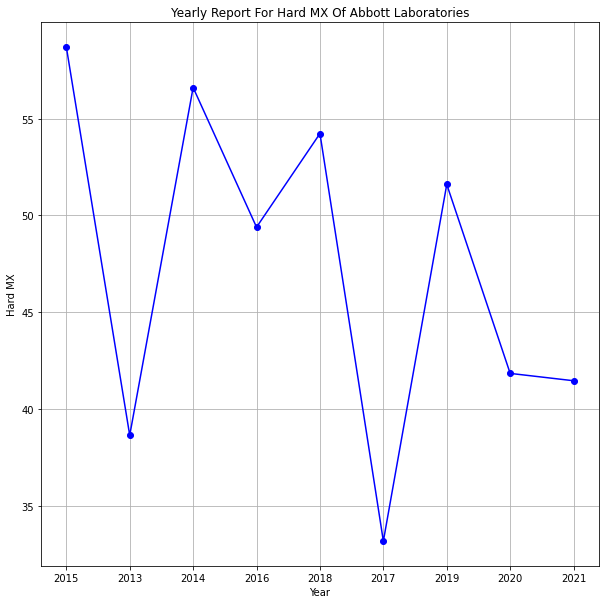


Plot Of Apple Inc Hard Mx ratio year wise


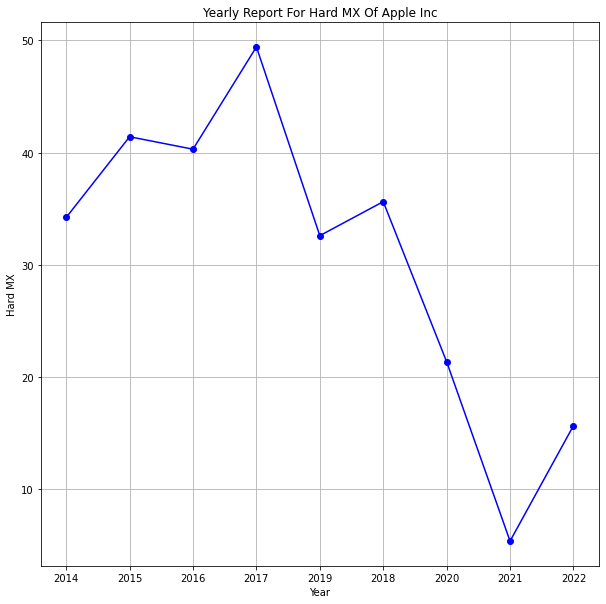

In [ ]:
%cd /content/drive/MyDrive/Outputs/
CompanyDataCount = {} #Dictionary To save which company name as key and list of reports of different years as values
#Loop to get each company's each reports words list 
for companyName,companyReports in CompanyData.items():
    #Making directories to save the output
    if not os.path.isdir(companyName):
      os.makedirs(companyName)
    CompanyREPORTCount = {} #Dictionary Save Each report name of a company and its words with their count in the report
    Hard_Mx = []
    Years = []
    table_data = [[]]
    for reportName,report in companyReports.items():
        word_counts = Counter(report)
        CompanyREPORTCount[reportName]=word_counts
        #Saving all years in a list
        Number_Years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
        #Getting all the numbers from the reports words list 
        Numbers_In_Report = [item for subitem in report for item in subitem.split() if item.isdigit()]
        #Getting all the words from the reports words list 
        Words_In_Report = [item for subitem in report for item in subitem.split() if not item.isdigit()]
        #Removing all the years from the numbers list
        Numbers_In_Report = [item for item in Numbers_In_Report if item not in Number_Years]
        #Getting list for the page numbers
        Page_Numbers = list(range(MaxPage_Number+1))
        Page_Numbers = list(map(str, Page_Numbers))
        #Removing all the page numbers from the numbers list
        Numbers_In_Report = [item for item in Numbers_In_Report if item not in Page_Numbers]
        #Calculating Hard Mx value for each year report and appending it to save for the plot
        H_MX = (len(Numbers_In_Report)/len(Words_In_Report)) * 1000
        H_MX = float("%.2f" % H_MX)
        Hard_Mx.append(H_MX)
        #Extracting Year from report name
        Year = re.findall(r'\d+', reportName)
        #Saving the year, hard mx ratio
        Years.append(Year[0])
        index=[]
        index.append(companyName)
        index.append(Year[0])
        index.append(len(Numbers_In_Report))
        index.append(len(Words_In_Report))
        index.append(float("%.2f" % H_MX))
        table_data.append(index)
    
        
    col_names = ["COMPANY","YEAR","N","NUM_WORDS","HARD_MX"]
    with open(companyName+"/HARD_MX_Table.txt", "w") as f:
        f.write(tabulate(table_data, headers=col_names))
    #Plot the Hard Mx Ratio for year wise report by company
    print("Plot Of",companyName,"Hard Mx ratio year wise") 
    plt.figure(figsize=(10, 10))
    plt.plot(Years,Hard_Mx, color='blue', marker='o')
    plt.title('Yearly Report For Hard MX Of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Hard MX')
    plt.grid(True)
    #Saving the plot in the drive
    plt.savefig(companyName+"/Hard_MX "+companyName+".png") #save as png
    plt.show()
    print()
    #Saving the company name as key with the report list having words list with thier count
    CompanyDataCount[companyName] = CompanyREPORTCount

Plot of Negative and Positive Words Frequency of Abbott Laboratories On Yearly Bases


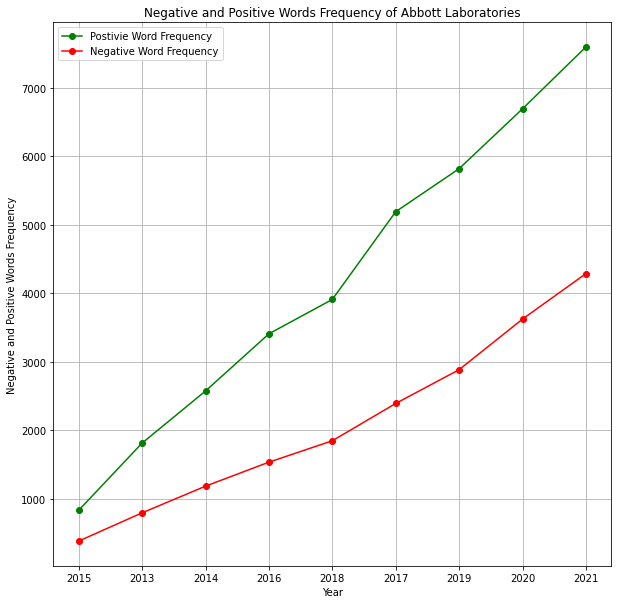

Plot of Optimistic Tone of Abbott Laboratories


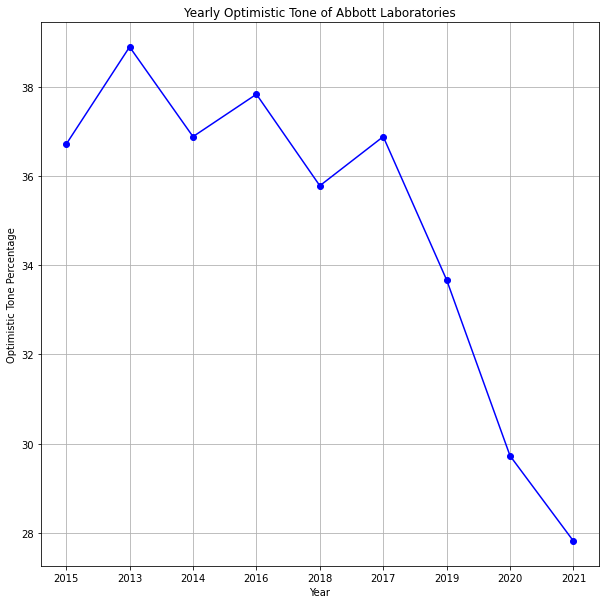


Plot of Z-Scores of Abbott Laboratories


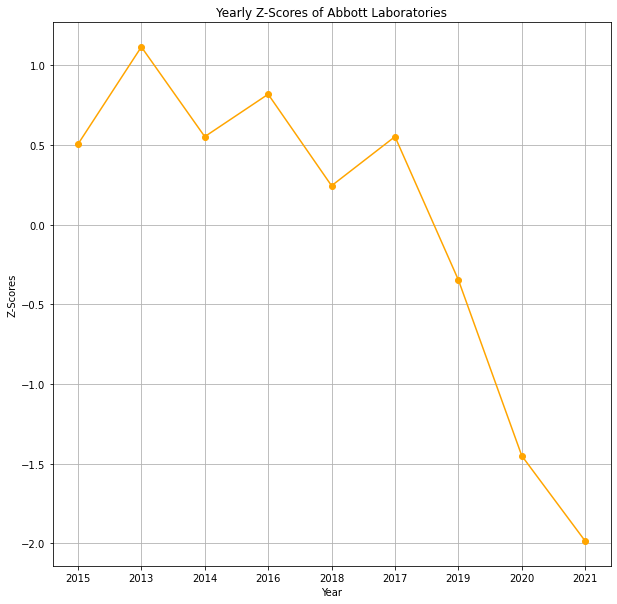


Plot Of Abbott Laboratories To Check Is it Greenwash Or Not


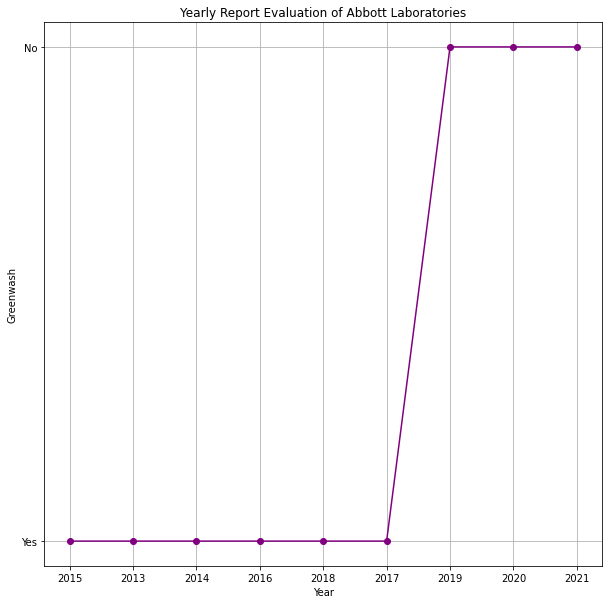


Plot of Negative and Positive Words Frequency of Apple Inc On Yearly Bases


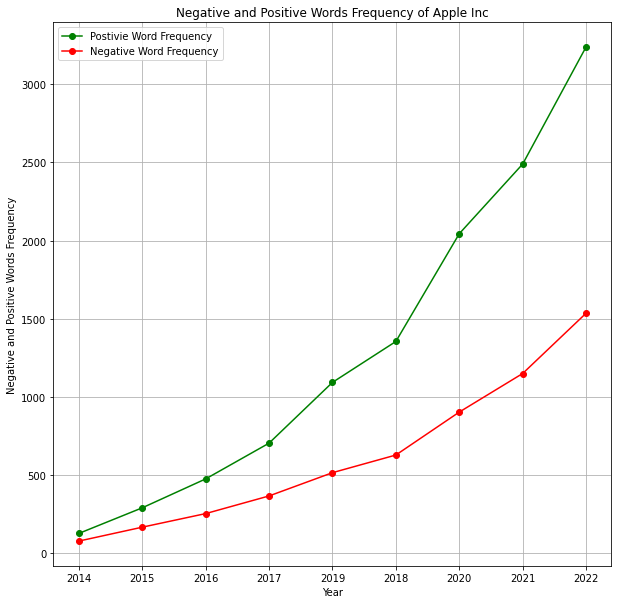

Plot of Optimistic Tone of Apple Inc


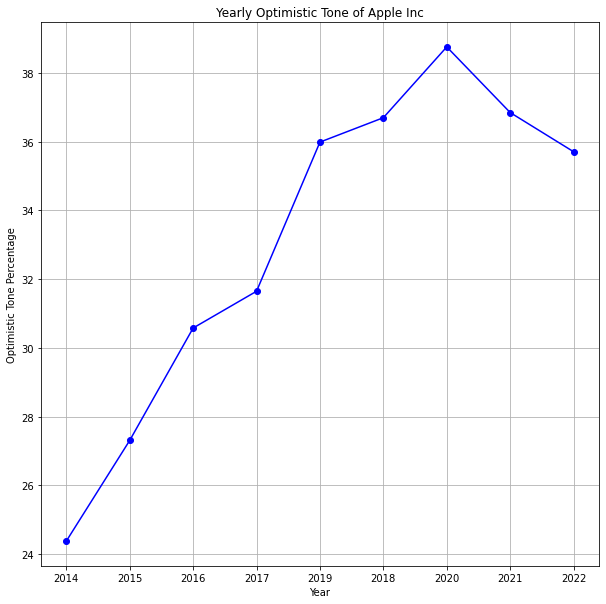


Plot of Z-Scores of Apple Inc


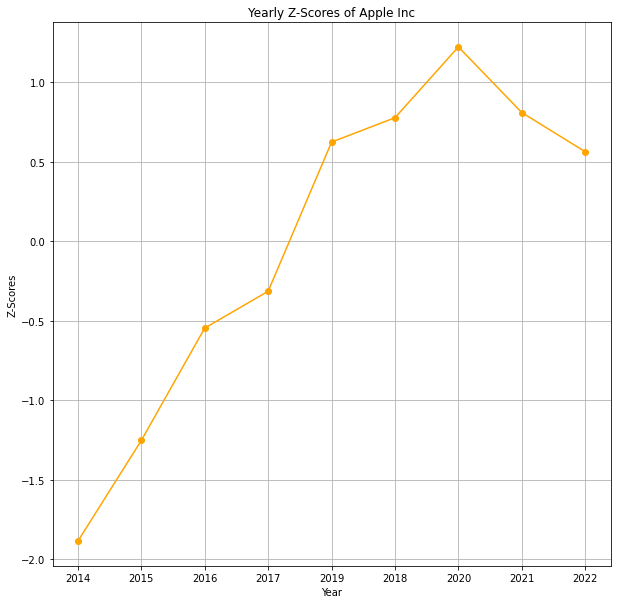


Plot Of Apple Inc To Check Is it Greenwash Or Not


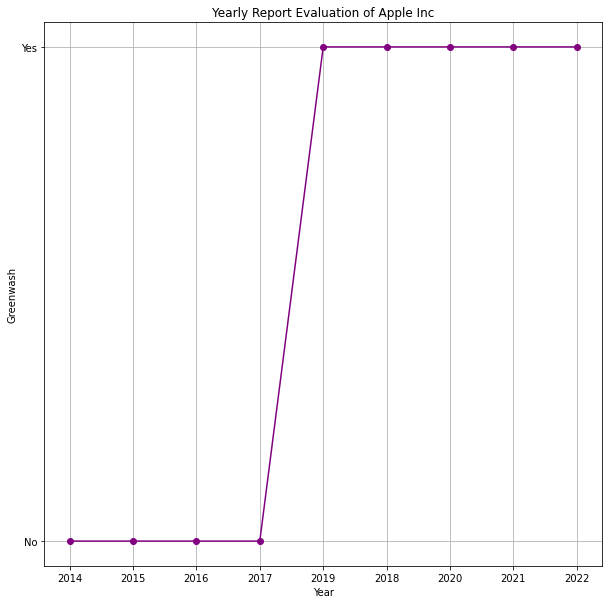

In [ ]:
#Loop to get each company's each reports words list 
for companyName,companyReports in CompanyDataCount.items():
    positive_words = 0 #Saving Count of positive words
    negative_words = 0 #Saving Count of negative words
    totalPositiveNegative = 0 #Saving Count of positive & negative words
    Optimistic_tone_Company = [] #Optimistic tone of each year report
    Years = [] #Years in which report is submitted by the company
    Negative = [] #List of negatives words on yearly basis
    Positive = [] #List of positives words on yearly basis
    table_data=[[]]
    for reportName,report in companyReports.items():
        #Counting negative & positive words in the report
        for word,count in report.items():
            if word in lmdict["Positive"]:
                positive_words += count
                totalPositiveNegative += count
            elif word in lmdict["Negative"]:
                negative_words += count
                totalPositiveNegative += count

        if totalPositiveNegative == 0:
          continue

        #Extracting Year from report name
        Year = re.findall(r'\d+', reportName)
        #Calculating Optimistic tone and saving it
        Optimistic_tone = ((positive_words - negative_words)/totalPositiveNegative) * 100
        Optimistic_tone_Company.append(float("%.2f" % Optimistic_tone))
        #Saving the year, positive word count and negative count
        Years.append(Year[0])
        Negative.append(negative_words)
        Positive.append(positive_words)
        #Saving year,Optimistic tone, positive word count and negative count in the file
        index=[]
        index.append(companyName)
        index.append(Year[0])
        index.append(negative_words)
        index.append(positive_words)
        index.append(float("%.2f" % Optimistic_tone))
        table_data.append(index)
        
    col_names = ["COMPANY","YEAR","NUM_NEGATIVE_WORDS","NUM_POSITIVE_WORDS","OPTIMISTIC_TONE"]
    with open(companyName+"/Optimistic_Tone_Table.txt", "w") as f:
        f.write(tabulate(table_data, headers=col_names))
    #Plot the count of negative & postive words year wise report by company
    print("Plot of Negative and Positive Words Frequency of",companyName,"On Yearly Bases")  
    plt.figure(figsize=(10, 10))
    plt.plot(Years,Positive, color='green', marker='o', label="Postivie Word Frequency")
    plt.plot(Years,Negative, color='red', marker='o',label="Negative Word Frequency")
    plt.title('Negative and Positive Words Frequency of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Negative and Positive Words Frequency')
    plt.grid(True)
    plt.legend()
    #Saving the plot in the drive
    plt.savefig(companyName+"/Negative_Positive "+companyName+".png") #save as png
    plt.show()
    #Plot the optimistic tone year wise report by company
    print("Plot of Optimistic Tone of",companyName)  
    plt.figure(figsize=(10, 10))
    plt.plot(Years,Optimistic_tone_Company, color='blue', marker='o')
    plt.title('Yearly Optimistic Tone of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Optimistic Tone Percentage')
    plt.grid(True)
    #Saving the plot in the drive
    plt.savefig(companyName+"/Optimistic_Tone "+companyName+".png") #save as png
    plt.show()
    print()
    #Calculating Z-Score
    zscores = stats.zscore(Optimistic_tone_Company)
    #Saving Z-score in the file
    table_data=[[]]
    for i in range(len(zscores)):
        index=[]
        index.append(companyName)
        index.append(Years[i])
        index.append((zscores[i]))
        table_data.append(index)
    col_names = ["COMPANY","YEAR","Z_SCORE"]
    with open(companyName+"/Z_Score_Table.txt", "w") as f:
        f.write(tabulate(table_data, headers=col_names))
    #Plot the Z-score year wise report by company
    print("Plot of Z-Scores of",companyName) 
    plt.figure(figsize=(10, 10))
    plt.plot(Years,zscores, color='orange', marker='o')
    plt.title('Yearly Z-Scores of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Z-Scores')
    plt.grid(True)
    #Saving the plot in the drive
    plt.savefig(companyName+"/Z_Score "+companyName+".png") #save as png
    plt.show()
    print()
    Greenwash=[]
    #Finding Company is greenwash or not using the z-scores
    for i in zscores:
        if i > 0 :
            Greenwash.append("Yes")
        elif i < 0:
            Greenwash.append("No")
        else:
            Greenwash.append("Neutral")
    #Plot the Greenwash is yes or no year wise report by company
    print("Plot Of",companyName,"To Check Is it Greenwash Or Not") 
    plt.figure(figsize=(10, 10))
    plt.plot(Years,Greenwash, color='purple', marker='o')
    plt.title('Yearly Report Evaluation of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Greenwash')
    plt.grid(True)
    #Saving the plot in the drive
    plt.savefig(companyName+"/Greenwash "+companyName+".png") #save as png
    plt.show()
    print()

In [ ]:
#Tokenizing and cleaning the dataframe we created earlier cotaining the words list or each report with the company name
dataframe['Tokenized_data'] = dataframe.data.apply(mts.sent_tok)
dataframe['Cleaned_data'] = pd.Series()    
dataframe=dataframe[dataframe['Tokenized_data'].map(lambda d: len(d)) > 0]
dataframe=dataframe.reset_index(drop=True) #Resetting the indexes
for i in range(len(dataframe['Tokenized_data'])):
  dataframe['Cleaned_data'][i] = [mts.clean_data(x,lower = True,punctuations=True,number=False,unicode=True,stop_words=False) for x in dataframe['Tokenized_data'][i]] 

In [ ]:
#Removing the empty data from the dataframe
for i in range(len(dataframe['Cleaned_data'])):
  for k in range(len(dataframe['Cleaned_data'][i])):
    dataframe['Cleaned_data'][i][k] = dataframe['Cleaned_data'][i][k].replace('\n',' ')
    if dataframe['Cleaned_data'][i][k].isspace():
      dataframe.drop([i], axis=0, inplace=True)
      break
dataframe=dataframe.reset_index(drop=True) #Resetting the indexes

In [ ]:
#Calculating the boiler plate score using the more than sentimental python library
dataframe['Boiler_Plate'] = mts.Boilerplate(dataframe.Cleaned_data, n = 4, min_doc = int(0.3*(len(dataframe)))-1, get_ngram = False)

Flag the Sentence: 100%|██████████| 18/18 [02:01<00:00,  6.75s/it]


'======================== Boilerplate Calculation Started ========================='

'======================== Boilerplate Calculation Finished ========================'

In [ ]:
Data = dataframe[["Company","Report","Boiler_Plate"]]
DataBoilerAnalysis = {} #Store boiler plate score for each company year wise
#Loop to extract the boiler plate score from dataframe and stores in the dictionary
for row in Data["Company"].unique():
    reportDict = {}
    report = Data.loc[Data['Company'] == row, 'Report']
    boilerplate = Data.loc[Data['Company'] == row, 'Boiler_Plate']
    report=report.reset_index(drop=True) 
    boilerplate=boilerplate.reset_index(drop=True) 
    for i in range(len(report)):
        reportDict[report[i]] = boilerplate[i]
    DataBoilerAnalysis[row] = reportDict

Plot of Boiler Scores of Abbott Laboratories


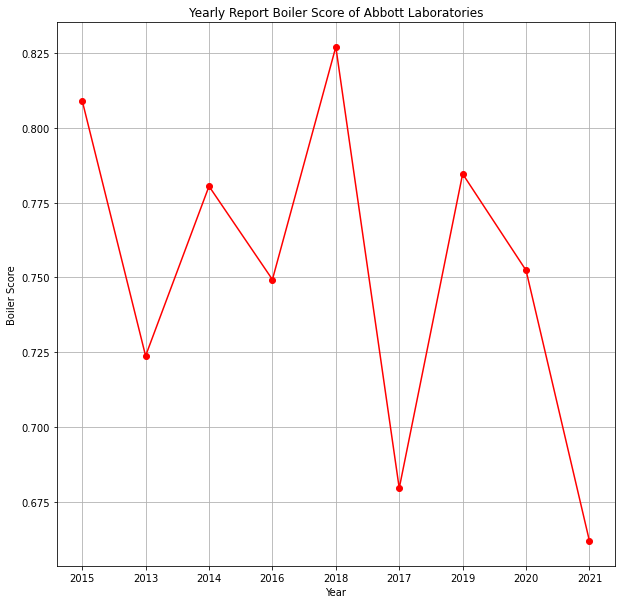


Plot Of Abbott Laboratories To Check Is it Greenwash Or Not Using Boiler Score


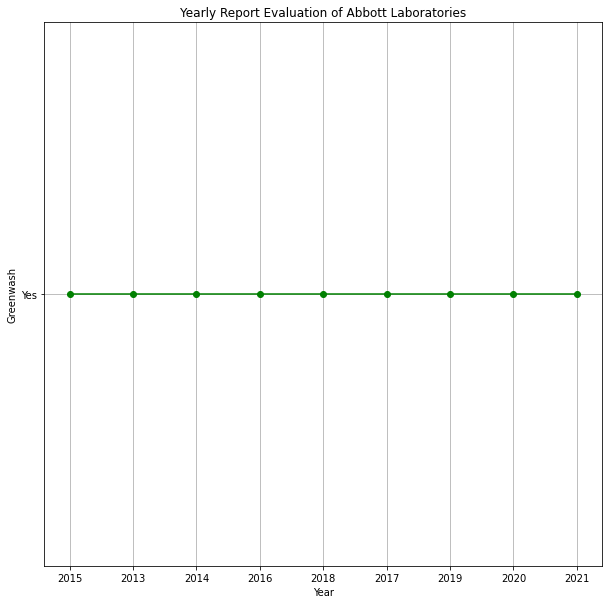

Plot of Boiler Scores of Apple Inc


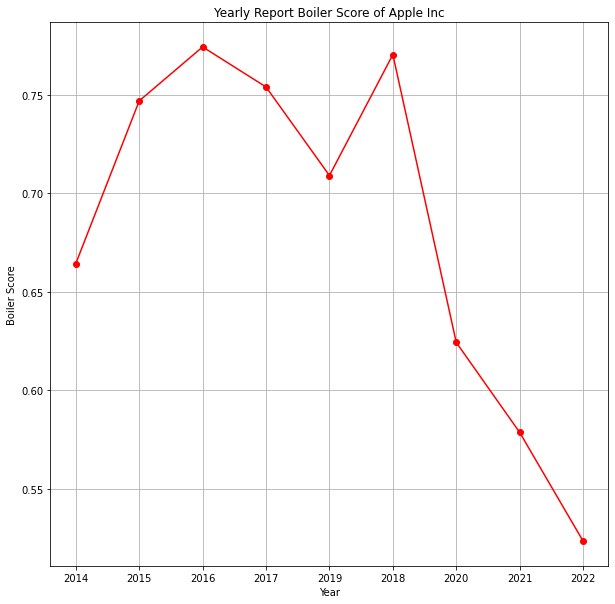


Plot Of Apple Inc To Check Is it Greenwash Or Not Using Boiler Score


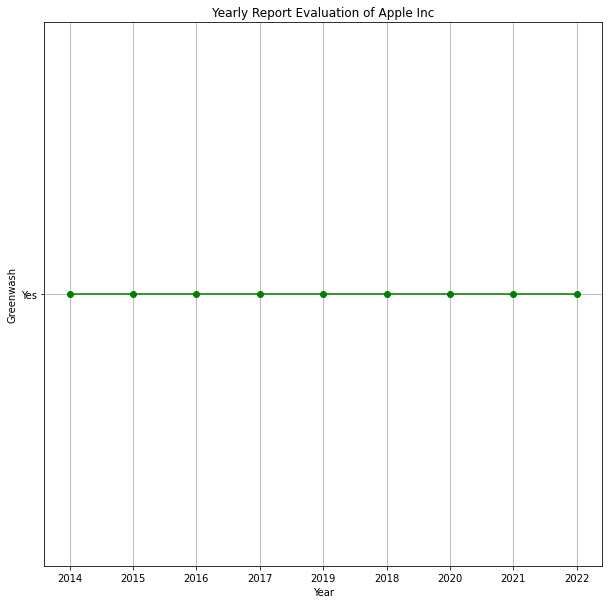

In [ ]:
#Loop to get each company's boiler score year wise
for companyName,companyReports in DataBoilerAnalysis.items():
    BoilerScore = [] #Store boiler score in the list of a company for each year
    Greenwash = []  #Store is the company greenwash or not year wise 
    Years = [] #Stores year
    table_data=[[]]
    for reportName,boilerScore in companyReports.items():
        data = CompanyData[companyName]
        report = data[reportName]
        #Saving all years in a list
        Number_Years=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
        #Getting all the numbers from the reports words list 
        Numbers_In_Report = [item for subitem in report for item in subitem.split() if item.isdigit()]
        #Getting all the words from the reports words list 
        Words_In_Report = [item for subitem in report for item in subitem.split() if not item.isdigit()]
        #Removing all the years from the numbers list
        Numbers_In_Report = [item for item in Numbers_In_Report if item not in Number_Years]
        #Getting list for the page numbers
        Page_Numbers = list(range(MaxPage_Number+1))
        Page_Numbers = list(map(str, Page_Numbers))
        #Removing all the page numbers from the numbers list
        Numbers_In_Report = [item for item in Numbers_In_Report if item not in Page_Numbers]
        #Extract Year from the report name
        Year = re.findall(r'\d+', reportName)
        BoilerScore.append(boilerScore) #Appending boiler score along with the year in the respective lists
        Years.append(Year[0])
        index=[]
        index.append(companyName)
        index.append(Year[0])
        index.append(len(Numbers_In_Report))
        index.append(len(Words_In_Report))
        index.append((boilerScore))
        table_data.append(index)
        #Checking the company report is greenwash or not on the basis of the boiler score
        if boilerScore > 0.5 :
            Greenwash.append("Yes")
        elif boilerScore < 0.5:
            Greenwash.append("No")
        else:
            Greenwash.append("Neutral")
    col_names = ["COMPANY","YEAR", "N","NUM_WORDS","BOILER_PLATE"]
    with open(companyName+"/Characteristic_Table.txt", "w") as f:
        f.write(tabulate(table_data, headers=col_names))
    
    #Plot the Boiler Score year wise report by company
    print("Plot of Boiler Scores of",companyName) 
    plt.figure(figsize=(10, 10))
    plt.plot(Years,BoilerScore, color='red', marker='o')
    plt.title('Yearly Report Boiler Score of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Boiler Score')
    #Saving the plot in the drive
    plt.savefig(companyName +"/Boiler Score "+companyName+".png") #save as png
    plt.grid(True)
    plt.show()
    print()
    #Plot the Greenwash is yes or no year wise report by company
    print("Plot Of",companyName,"To Check Is it Greenwash Or Not Using Boiler Score") 
    plt.figure(figsize=(10, 10))
    plt.plot(Years,Greenwash, color='green', marker='o')
    plt.title('Yearly Report Evaluation of '+companyName)
    plt.xlabel('Year')
    plt.ylabel('Greenwash')
    plt.grid(True)
    #Saving the plot in the drive
    plt.savefig(companyName +"/Greenwash Boiler Score "+companyName+".png") #save as png
    plt.show()
